In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
df = pd.DataFrame({
    "area":[2600, 3000, 3200, 3600, 4000],
    "price":[550000, 565000, 610000, 680000, 725000],
})
df

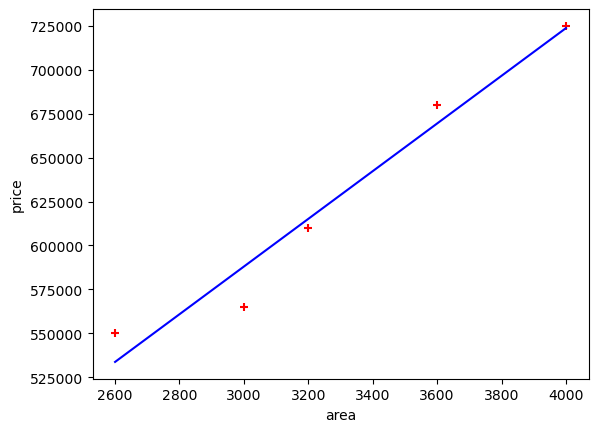

In [59]:
%matplotlib inline

plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area, df.price, color = "red", marker = "+", label = "data points")
m, b = np.polyfit(df.area.values, df.price.values, 1)
plt.plot(df.area.values, m * df.area.values + b, color = "blue", label = "regression line" )

In [60]:
reg = linear_model.LinearRegression()
reg.fit(df[["area"]], df.price)

LinearRegression()

In [61]:
reg.predict(np.array([[3300]]))

C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [62]:
reg.coef_, reg.intercept_

(array([135.78767123]), 180616.43835616432)

In [63]:
future = pd.DataFrame({
    "area":[1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]
})

In [64]:
# Make predictions for future data
future["price"] = reg.predict(future)
combined_df = pd.concat([df, future], ignore_index = True)


In [65]:
combined_df

,area,price
0,2600,5.500000e+05
1,3000,5.650000e+05
2,3200,6.100000e+05
3,3600,6.800000e+05
4,4000,7.250000e+05
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05


In [19]:
import pandas as pd
data = pd.DataFrame({
    "X":[i  for i in range(1, 5)] + [67, 50],
    "y":[i  for i in range(6, 10)] + [10, 17]
})
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

model_params = {
    "IsolationForest":IsolationForest(contamination = 0.1),
    "LocalOutlierFactor": LocalOutlierFactor(n_neighbors = 2, contamination = 0.1),
    "OneClassSVM": OneClassSVM(nu = 0.1)
}
for name, model in model_params.items():
    if name == "LocalOutlierFactor":
        data[name] = model.fit_predict(data[["X"]])
    else:
        data[name] = model.fit_predict(data[["X"]])

C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [23]:
def calculate_y_true(row):
    mode = row[["LocalOutlierFactor", "OneClassSVM"]].mode()
    if len(mode) == 1:
        return mode
    else:
        return row[["LocalOutlierFactor", "OneClassSVM", "IsolationForest"]].mode()
data["y_true"] = data.apply(calculate_y_true, axis=1)
data
        

,X,y,IsolationForest,LocalOutlierFactor,OneClassSVM,y_true
0,1,6,1,1,1,1
1,2,7,1,1,1,1
2,3,8,1,1,1,1
3,4,9,1,1,-1,1
4,67,10,-1,1,-1,-1
5,50,17,1,1,1,1


In [24]:
# calculating outlier
from sklearn.metrics import f1_score
y_pred = data["IsolationForest"]
y_true = data["y_true"]
score = f1_score(y_true, y_pred)
score

1.0

In [25]:
data_cleaned = data[data["IsolationForest"] == 1]
data_cleanes = data_cleaned.drop(columns = ["IsolationForest", "LocalOutlierFactor", "OneClassSVM"], axis = 1)
data_cleaned

,X,y,IsolationForest,LocalOutlierFactor,OneClassSVM,y_true
0,1,6,1,1,1,1
1,2,7,1,1,1,1
2,3,8,1,1,1,1
3,4,9,1,1,-1,1
5,50,17,1,1,1,1
